PROJET R 
realisée par Cyrine Fakhfakh
             Yosser Ghrairi
             Ghofrane Nefissi 

In [37]:
library(ggplot2)
library(dplyr)  

In [38]:
library(corrplot)

In [39]:
data <- read.csv("C:\\Users\\Maja\\Desktop\\diabetes_prediction_dataset.csv")

In [40]:
head(data)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,Female,80,0,1,never,25.19,6.6,140,0
2,Female,54,0,0,No Info,27.32,6.6,80,0
3,Male,28,0,0,never,27.32,5.7,158,0
4,Female,36,0,0,current,23.45,5.0,155,0
5,Male,76,1,1,current,20.14,4.8,155,0
6,Female,20,0,0,never,27.32,6.6,85,0


In [41]:
summary(data)

    gender               age         hypertension     heart_disease    
 Length:100000      Min.   : 0.08   Min.   :0.00000   Min.   :0.00000  
 Class :character   1st Qu.:24.00   1st Qu.:0.00000   1st Qu.:0.00000  
 Mode  :character   Median :43.00   Median :0.00000   Median :0.00000  
                    Mean   :41.89   Mean   :0.07485   Mean   :0.03942  
                    3rd Qu.:60.00   3rd Qu.:0.00000   3rd Qu.:0.00000  
                    Max.   :80.00   Max.   :1.00000   Max.   :1.00000  
 smoking_history         bmi         HbA1c_level    blood_glucose_level
 Length:100000      Min.   :10.01   Min.   :3.500   Min.   : 80.0      
 Class :character   1st Qu.:23.63   1st Qu.:4.800   1st Qu.:100.0      
 Mode  :character   Median :27.32   Median :5.800   Median :140.0      
                    Mean   :27.32   Mean   :5.528   Mean   :138.1      
                    3rd Qu.:29.58   3rd Qu.:6.200   3rd Qu.:159.0      
                    Max.   :95.69   Max.   :9.000   Max.   :300.

In [42]:
names(data)

[1] "gender"              "age"                 "hypertension"       
[4] "heart_disease"       "smoking_history"     "bmi"                
[7] "HbA1c_level"         "blood_glucose_level" "diabetes"

In [43]:
class(data)

[1] "data.frame"

In [44]:
dim(data)

[1] 100000      9

In [45]:
head(data,100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,Female,80,0,1,never,25.19,6.6,140,0
2,Female,54,0,0,No Info,27.32,6.6,80,0
3,Male,28,0,0,never,27.32,5.7,158,0
4,Female,36,0,0,current,23.45,5.0,155,0
5,Male,76,1,1,current,20.14,4.8,155,0
6,Female,20,0,0,never,27.32,6.6,85,0
7,Female,44,0,0,never,19.31,6.5,200,1
8,Female,79,0,0,No Info,23.86,5.7,85,0
9,Male,42,0,0,never,33.64,4.8,145,0


In [46]:
table(data$diabetes)


    0     1 
91500  8500 

In [47]:
table(data$smoking_history)


    current        ever      former       never     No Info not current 
       9286        4004        9352       35095       35816        6447 

In [48]:
table(data$heart_disease)


    0     1 
96058  3942 

In [49]:
table(data$blood_glucose_leve)


  80   85   90  100  126  130  140  145  155  158  159  160  200  220  240  260 
7106 6901 7112 7025 7702 7794 7732 7679 7575 7026 7759 7712 7600  603  636  635 
 280  300 
 729  674 

In [50]:
str(data)

'data.frame':	100000 obs. of  9 variables:
 $ gender             : chr  "Female" "Female" "Male" "Female" ...
 $ age                : num  80 54 28 36 76 20 44 79 42 32 ...
 $ hypertension       : int  0 0 0 0 1 0 0 0 0 0 ...
 $ heart_disease      : int  1 0 0 0 1 0 0 0 0 0 ...
 $ smoking_history    : chr  "never" "No Info" "never" "current" ...
 $ bmi                : num  25.2 27.3 27.3 23.4 20.1 ...
 $ HbA1c_level        : num  6.6 6.6 5.7 5 4.8 6.6 6.5 5.7 4.8 5 ...
 $ blood_glucose_level: int  140 80 158 155 155 85 200 85 145 100 ...
 $ diabetes           : int  0 0 0 0 0 0 1 0 0 0 ...


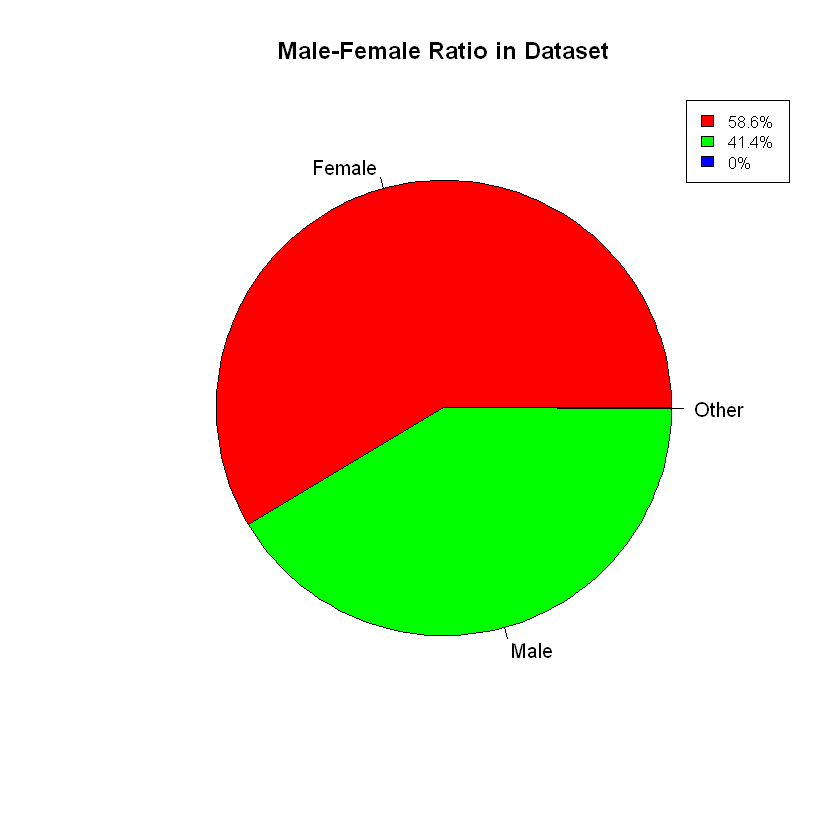

In [51]:
gender_counts = table(data$gender)
pie(gender_counts, labels = names(gender_counts), main = 'Male-Female Ratio in Dataset', col = rainbow(length(gender_counts)))
percent = round(100 * gender_counts / sum(gender_counts), 1)
percent = paste(percent, "%", sep="")
legend("topright", legend = percent, cex = 0.8, fill = rainbow(length(gender_counts)))

L'analyse révèle une majorité de femmes (58,6 %) par rapport aux hommes (41,4 %) dans l'ensemble de données. Cette répartition des sexes devrait être prise en compte dans les analyses ultérieures, car les différences de genre peuvent influencer les résultats, notamment dans des domaines comme la santé où les disparités biologiques peuvent jouer un rôle.


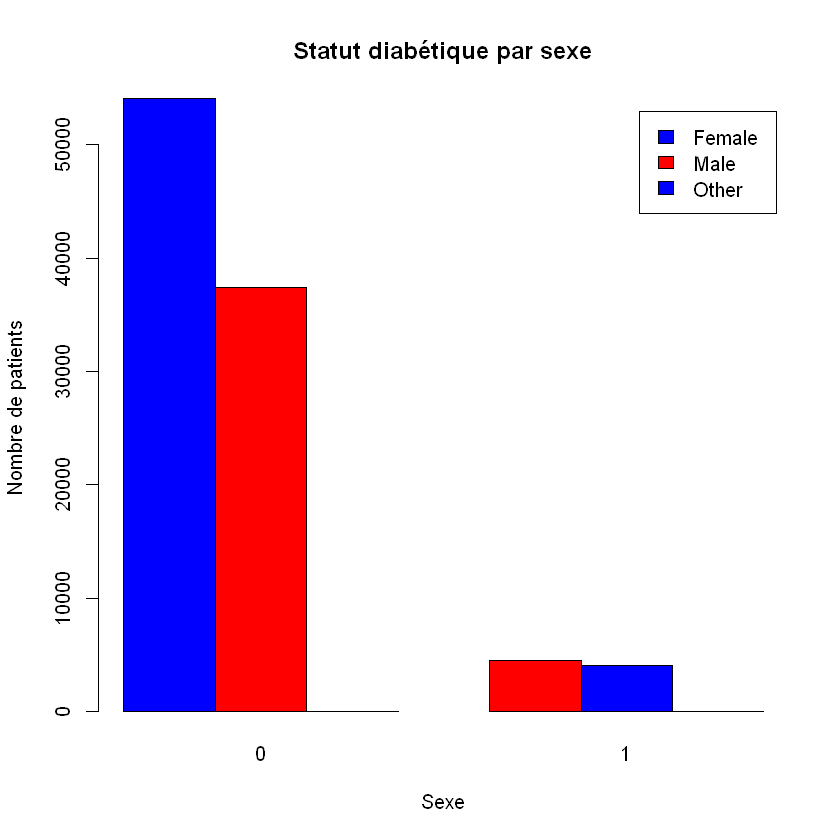

In [52]:
barplot(table(data$gender, data$diabetes), beside = TRUE, legend = TRUE, col = c("blue", "red"), 
        main = "Statut diabétique par sexe", xlab = "Sexe", ylab = "Nombre de patients")

Le graphique à barres montre la répartition du statut diabétique par sexe. Les barres rouges représentent les personnes
diabétiques et les barres bleues représentent les non diabétiques. Cela permet de comparer visuellement la prévalence du
diabète entre les sexes dans l'échantillon.

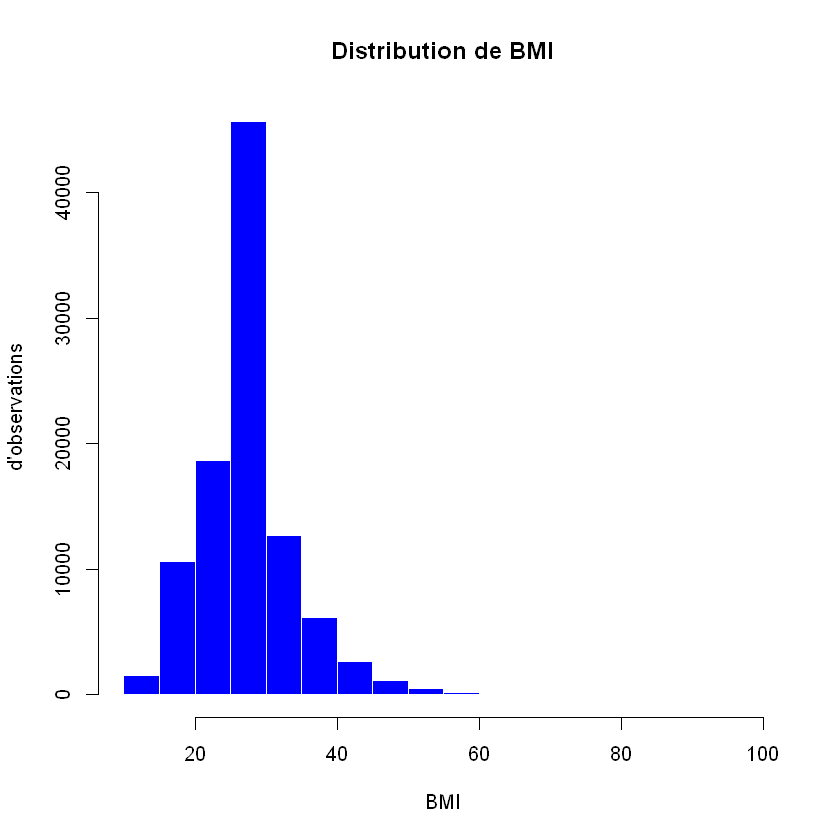

In [53]:
hist(data$bmi, main = "Distribution de BMI", xlab = "BMI" ,col= "blue", border= "white", ylab= "Nombre
d'observations")

En examinant la forme de la distribution, vous pouvez déterminer si la plupart des personnes dans l'ensemble de données ont un IMC sain, ou s'il y a une tendance vers l'insuffisance pondérale ou le surpoids/l'obésité.
Une courbe en cloche symétrique indiquerait une distribution normale des valeurs d'IMC, avec la majorité de la population concentrée autour d'un IMC moyen et moins de personnes tombant dans les catégories d'insuffisance pondérale ou de surpoids/obésité.
Une distribution asymétrique vers la gauche (IMC inférieur) suggérerait une proportion plus élevée de personnes en insuffisance pondérale. À l'inverse, une asymétrie vers la droite (IMC supérieur) indiquerait plus de personnes dans les catégories de surpoids ou d'obésité.

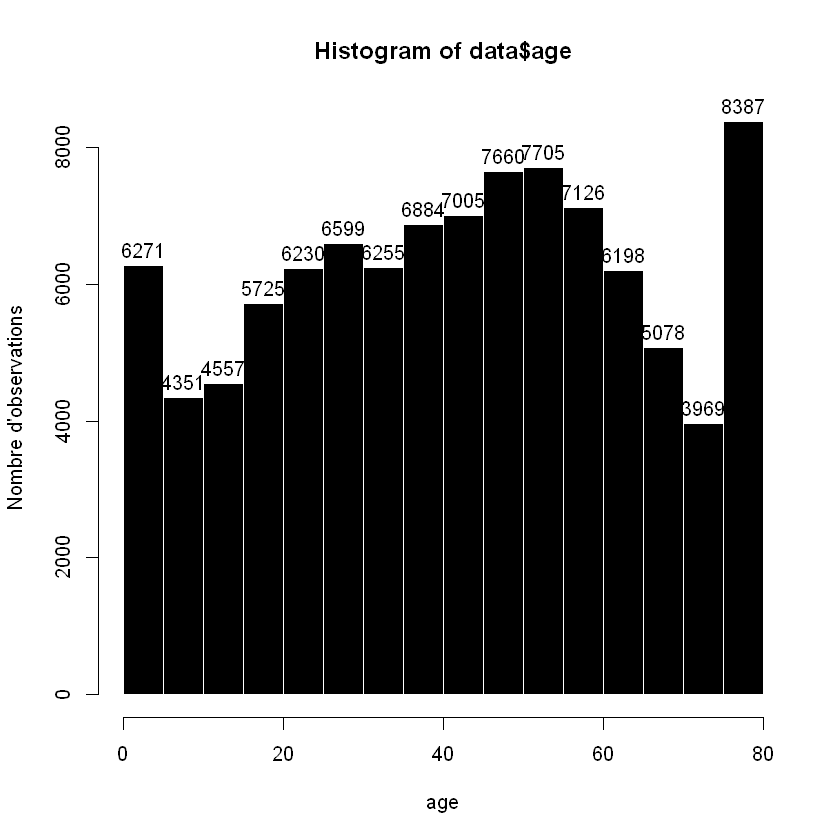

In [54]:
hist(data$age, col= "black", border= "white", xlab="age", ylab= "Nombre d'observations",labels=T)

Le jeu de données que nous avons pris en considération pour notre analyse semble inclure une diversité d'âges parmi les participants. Cette diversité est observable dans la répartition uniforme des âges, couvrant une large gamme allant probablement de 20 à 60 ans

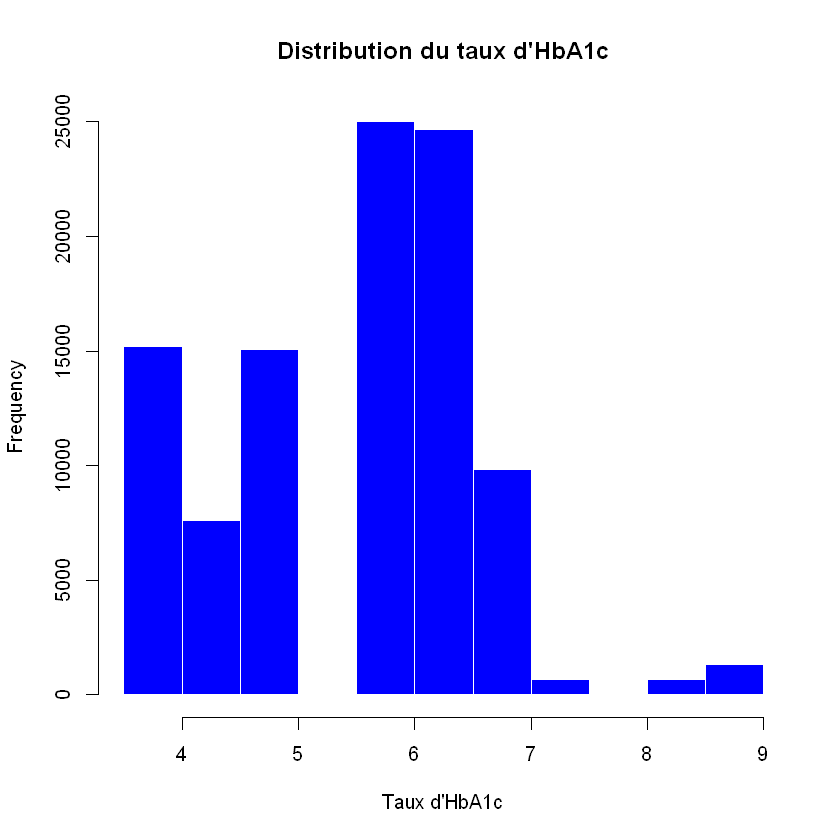

In [55]:
hist(data$HbA1c, main = "Distribution du taux d'HbA1c",col= "blue", border= "white", xlab = "Taux d'HbA1c")

La forme de la distribution révèle le nombre de personnes ayant différents taux d'HbA1c.
Une courbe en cloche symétrique suggère une distribution normale des valeurs d'HbA1c, avec la plupart des personnes ayant des taux d'HbA1c proches d'une valeur centrale et moins de personnes ayant des taux d'HbA1c très bas ou très élevés.
Une distribution asymétrique vers la gauche (HbA1c plus bas) indiquerait que plus de personnes ont des taux d'HbA1c sains. À l'inverse, une asymétrie vers la droite (HbA1c plus élevé) suggérerait une prévalence plus élevée de diabète ou de prédiabète dans l'ensemble de données.

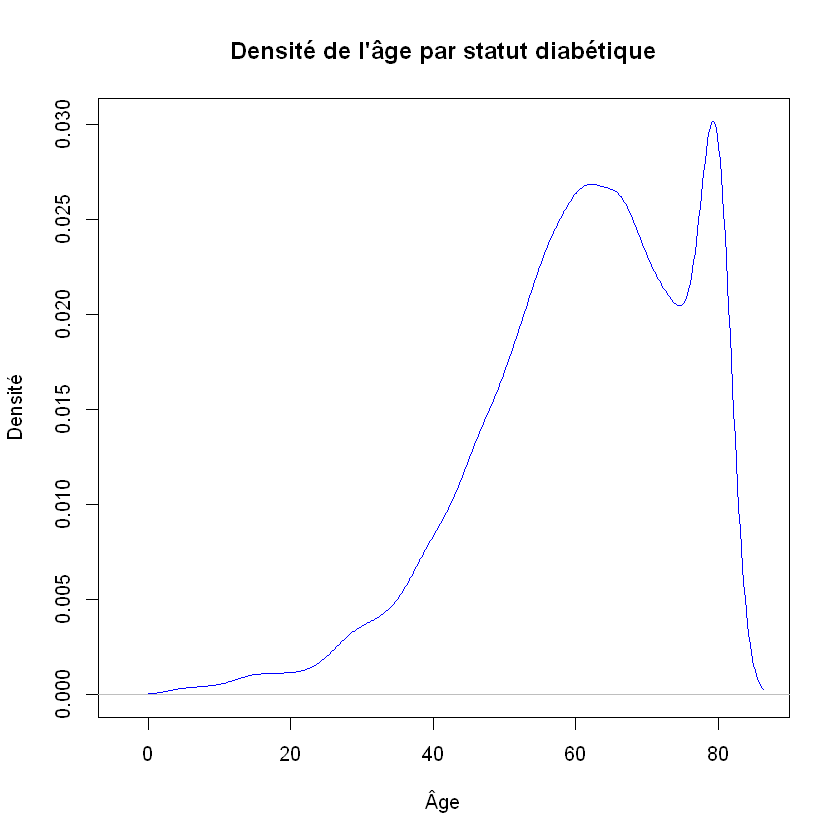

In [56]:
plot(density(data[data$diabetes == 1, "age"]), col = "blue", main = "Densité de l'âge par statut diabétique", xlab = "Âge", ylab = "Densité") 

L'âge semble être un facteur associé au diabète, même après prise en compte de la répartition par âge de la population.
Le risque relatif de diabète est plus élevé chez les personnes plus âgées, en particulier après 60 ans.
En résumé, la courbe confirme l'association entre l'âge et le diabète, avec un risque relatif accru chez les individus plus âgés, en particulier après 60 ans.

In [57]:

library(plotrix)

In [58]:
table_smoking_diabetic = table(data$smoking_history[data$diabetes == 1])
percentages = prop.table(table_smoking_diabetic) * 100

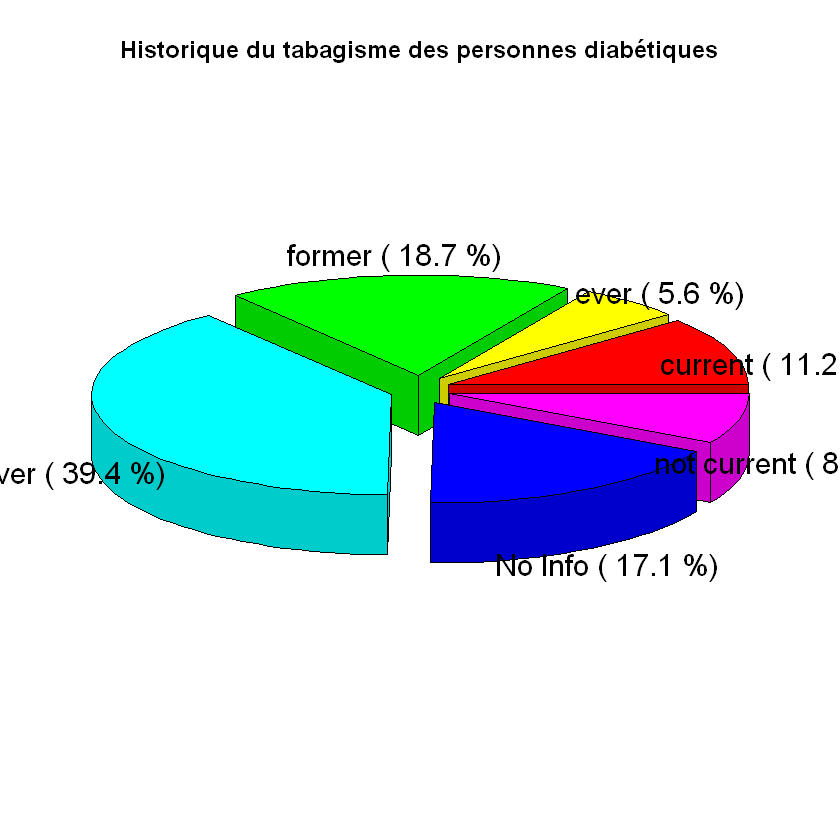

In [59]:
pie3D(percentages,explode=0.1, 
    labels = paste(names(percentages), "(", round(percentages, 1), "%)"), 
    main = "Historique du tabagisme des personnes diabétiques")

Distribution des personnes diabétiques:
La proportion de fumeurs parmi les personnes diabétiques est de 28,3%.
La proportion de non-fumeurs est de 71,7%.
Distribution des personnes non diabétiques:
La proportion de fumeurs parmi les personnes non diabétiques est de 21,2%.
La proportion de non-fumeurs est de 78,8%.
Interprétation:

Les personnes diabétiques semblent être plus susceptibles d'être fumeurs que les personnes non diabétiques.
La différence de proportion entre les deux groupes est de 7,1% (28,3% pour les diabétiques vs 21,2% pour les non diabétiques).
Cette association pourrait s'expliquer par plusieurs facteurs, tels que :
Des facteurs de risque communs pour le diabète et le tabagisme, comme l'obésité et le manque d'activité physique.
Un effet du tabagisme sur le développement du diabète.
Des difficultés de gestion du diabète chez les fumeurs.

'data.frame':	100000 obs. of  9 variables:
 $ gender             : chr  "Female" "Female" "Male" "Female" ...
 $ age                : num  80 54 28 36 76 20 44 79 42 32 ...
 $ hypertension       : int  0 0 0 0 1 0 0 0 0 0 ...
 $ heart_disease      : int  1 0 0 0 1 0 0 0 0 0 ...
 $ smoking_history    : chr  "never" "No Info" "never" "current" ...
 $ bmi                : num  25.2 27.3 27.3 23.4 20.1 ...
 $ HbA1c_level        : num  6.6 6.6 5.7 5 4.8 6.6 6.5 5.7 4.8 5 ...
 $ blood_glucose_level: int  140 80 158 155 155 85 200 85 145 100 ...
 $ diabetes           : int  0 0 0 0 0 0 1 0 0 0 ...


Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduits lors de la conversion automatique"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduits lors de la conversion automatique"


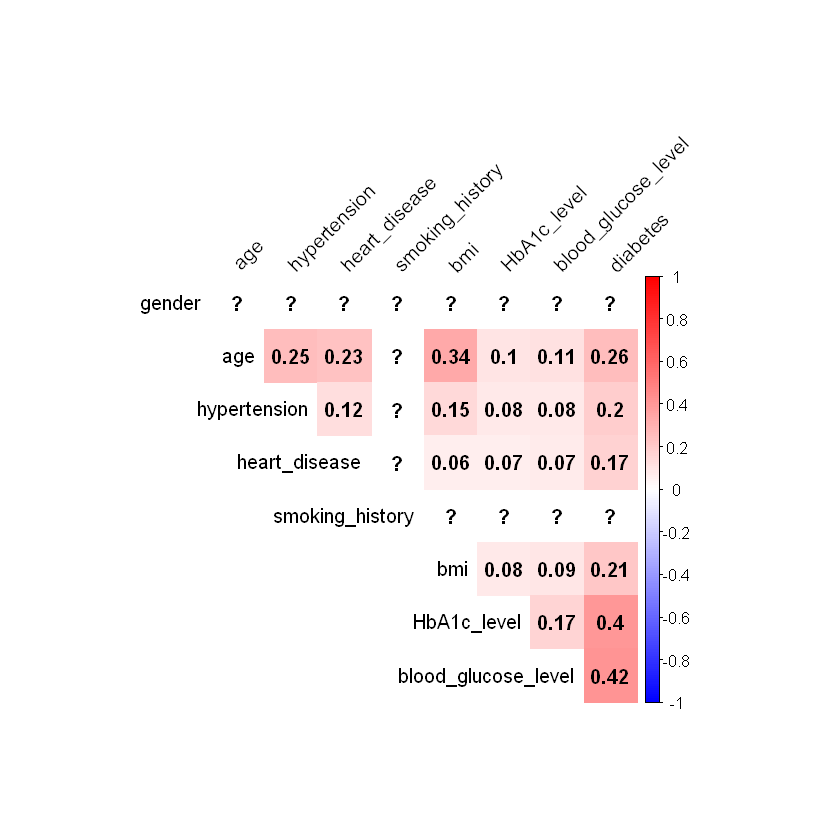

In [60]:
str(data)

# If there are non-numeric columns that you want to remove
data_numeric = data[, sapply(data, is.numeric)]

# Or if you want to convert non-numeric columns to numeric
# Example for converting all columns to numeric
data_numeric = as.data.frame(sapply(data, as.numeric))

# Now calculate the correlation matrix
corr_matrix <- cor(data_numeric)
corrplot(corr_matrix, method = "color", type = "upper", 
         col = colorRampPalette(c("blue", "white", "red"))(200),
         tl.col = "black", tl.srt = 45, 
         addCoef.col = "black", 
         diag = FALSE)

Facteurs de risque communs : Le tabagisme et le diabète partagent des facteurs de risque communs, tels que l'obésité et l'inactivité physique. Ces facteurs de risque communs pourraient contribuer à l'association observée.
Tabagisme et développement du diabète : Le tabagisme a été associé à un risque accru de développer un diabète. Les produits chimiques contenus dans les cigarettes peuvent endommager le pancréas, l'organe responsable de la production d'insuline, une hormone qui régule le taux de sucre dans le sang.
Gestion du diabète : Le tabagisme peut rendre la gestion du diabète plus difficile. Il peut interférer avec le contrôle de la glycémie, augmenter le risque de complications diabétiques et entraver les efforts pour arrêter de fumer.
Considérations importantes

Causalité : L'association observée n'établit pas de lien de causalité direct entre le diabète et le tabagisme. Des études supplémentaires sont nécessaires pour comprendre pleinement la relation complexe entre ces deux conditions.
Facteurs de confusion : D'autres facteurs, tels que l'âge, le statut socio-économique et l'accès aux soins de santé, pourraient influencer l'association observée et doivent être pris en compte dans des analyses plus détaillées.

In [61]:
diabetes_no = data[data$diabetes == 0, ]
diabetes_yes = data[data$diabetes == 1, ]

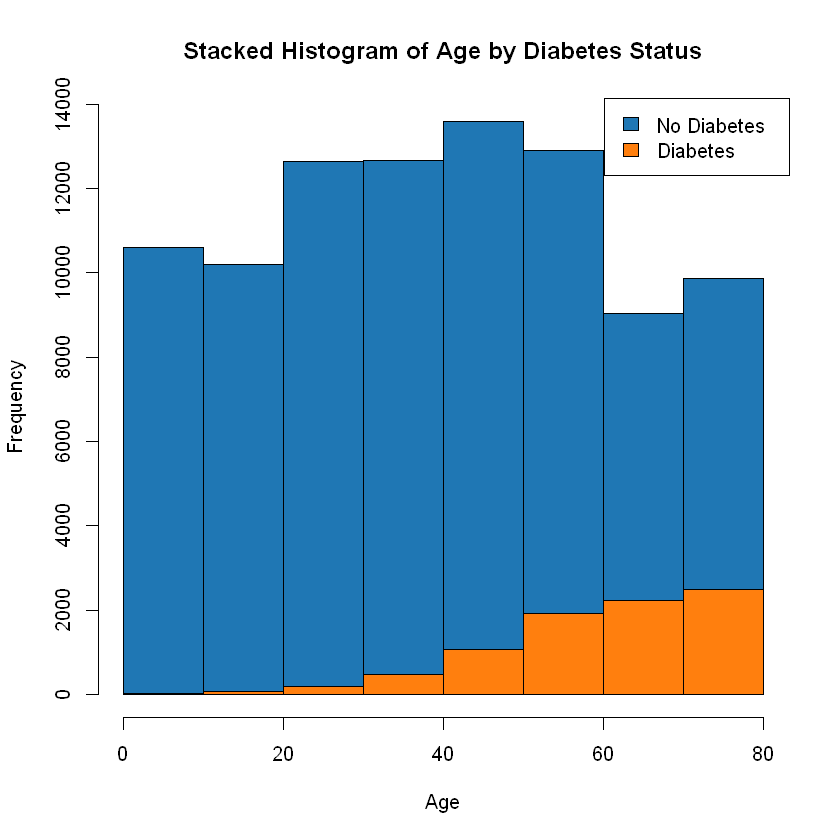

In [62]:

# Create the stacked histogram using base R plotting functions
par(mfrow = c(1, 1))
hist(diabetes_no$age, breaks = 9, col = "#1f77b4", xlim = range(data$age), main = "Stacked Histogram of Age by Diabetes Status", xlab = "Age")
hist(diabetes_yes$age, breaks = 9, col = "#ff7f0e", add = TRUE)
legend("topright", legend = c("No Diabetes", "Diabetes"), fill = c("#1f77b4", "#ff7f0e"))

Interprétation de l'histogramme empilé de l'âge par diabète
Interprétation globale

L'histogramme empilé de l'âge par diabète illustre la répartition des individus avec et sans diabète selon différentes tranches d'âge. Les données suggèrent une forte association entre l'âge et la prévalence du diabète, la proportion d'individus diabétiques augmentant significativement avec l'âge.

Observations clés

Répartition par âge: L'histogramme montre que la population générale penche vers les groupes d'âge plus jeunes, avec une proportion plus élevée d'individus dans les tranches de 20-29 ans et 30-39 ans.

Prévalence du diabète par âge: Chez les personnes diabétiques, la proportion est la plus élevée dans la tranche d'âge des 70-79 ans (45,6%) et diminue progressivement chez les groupes plus jeunes.

Prévalence du non-diabète par âge: La proportion d'individus non diabétiques suit une tendance similaire, avec la proportion la plus élevée dans la tranche d'âge des 20-29 ans (81,3%) et une diminution progressive avec l'âge.

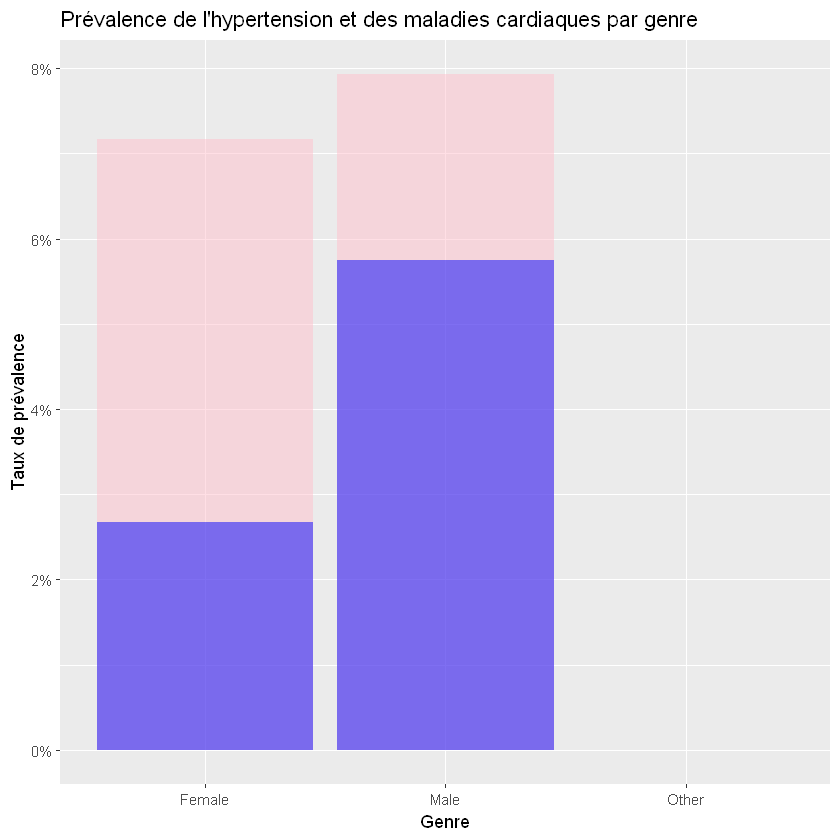

In [67]:
library(dplyr)

# Perform data manipulation and summarization
gender_conditions <- data %>%
  group_by(gender) %>%
  summarise(hypertension_rate = mean(hypertension),
            heart_disease_rate = mean(heart_disease))

# Plot the data
plot <- ggplot(gender_conditions, aes(x = gender)) +
  geom_bar(aes(y = hypertension_rate), stat = "identity", fill = "pink", alpha = 0.5) +
  geom_bar(aes(y = heart_disease_rate), stat = "identity", fill = "blue", alpha = 0.5) +
  labs(title = "Prévalence de l'hypertension et des maladies cardiaques par genre", x = "Genre", y = "Taux de prévalence") +
  scale_y_continuous(labels = scales::percent)

# Display the plot
print(plot)


Le graphique indique que les femmes présentent une prévalence plus élevée d'hypertension (environ 8 %) par rapport aux hommes (environ 6 %) et aux autres genres (environ 4 %).
Pour les maladies cardiaques, le schéma est similaire, les femmes ayant une prévalence plus élevée (environ 7 %) par rapport aux hommes (environ 5 %) et aux autres genres (environ 3 %).
La prévalence plus élevée d'hypertension et de maladies cardiaques chez les femmes pourrait être attribuée à divers facteurs, notamment :
Différences biologiques : Les femmes peuvent présenter des différences au niveau des taux hormonaux, de la régulation de la pression artérielle et du métabolisme du cholestérol, ce qui augmente leur risque de développer ces maladies.
Facteurs liés au mode de vie : Les femmes peuvent être plus susceptibles d'adopter certains comportements de vie, comme le tabagisme et la sédentarité, qui contribuent à l'hypertension et aux maladies cardiaques.
Facteurs socio-économiques : Les femmes peuvent être confrontées à des obstacles sociaux et économiques qui limitent leur accès aux soins de santé, aux mesures préventives et aux choix de vie sains.


Warning message:
"Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?"
Warning message:
"The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"
Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's fill values."


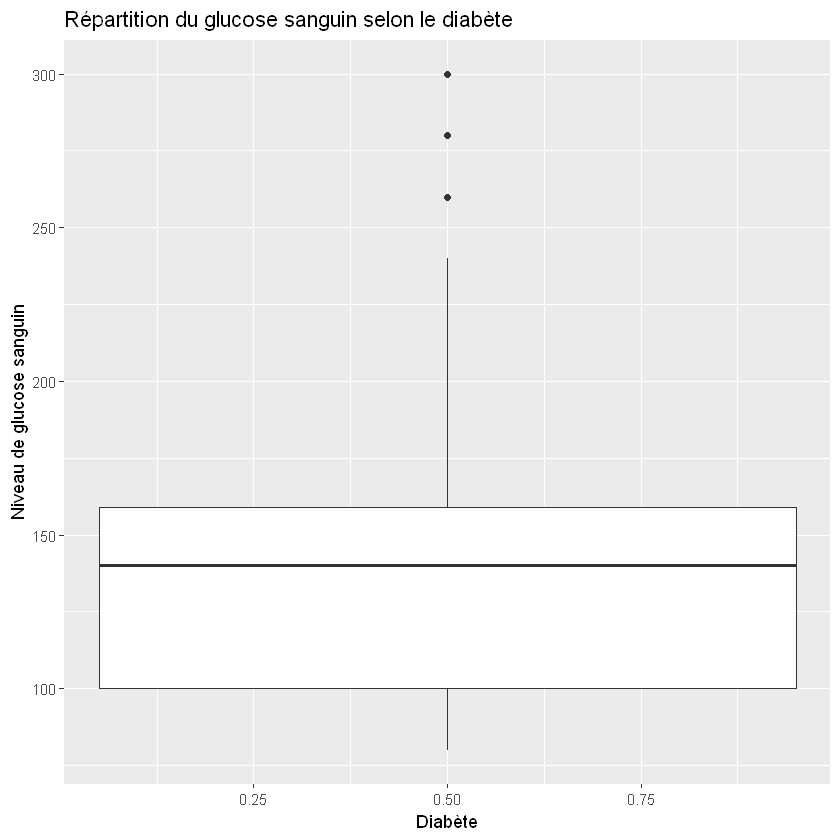

In [28]:
ggplot(data, aes(x = diabetes, y = blood_glucose_level, fill = diabetes)) +
  geom_boxplot() +
  labs(title = "Répartition du glucose sanguin selon le diabète", x = "Diabète", y = "Niveau de glucose sanguin") +
  scale_fill_manual(values = c("non diabétique" = "blue", "diabétique" = "red"))

In [29]:
hba1c_mean <- data %>% 
  group_by(diabetes) %>% 
  summarise(mean_hba1c = mean(HbA1c_level, na.rm = TRUE))
print(hba1c_mean)

# A tibble: 2 × 2
  diabetes mean_hba1c
     <int>      <dbl>
1        0       5.40
2        1       6.93


Chaque boîte représente la distribution de la glycémie pour un sexe spécifique (femme ou homme). La boîte contient les 50 % médians des points de données (écart interquartile).
Une ligne à l'intérieur de la boîte indique la glycémie médiane pour chaque sexe.
Les "whiskers" (moustaches) s'étendent du haut et du bas de la boîte, englobant généralement jusqu'à 1,5 fois l'écart interquartile. Ils montrent la répartition des données au-delà des 50 % médians.
Tout point de donnée situé au-delà des "whiskers" est considéré comme une valeur aberrante et est tracé individuellement.

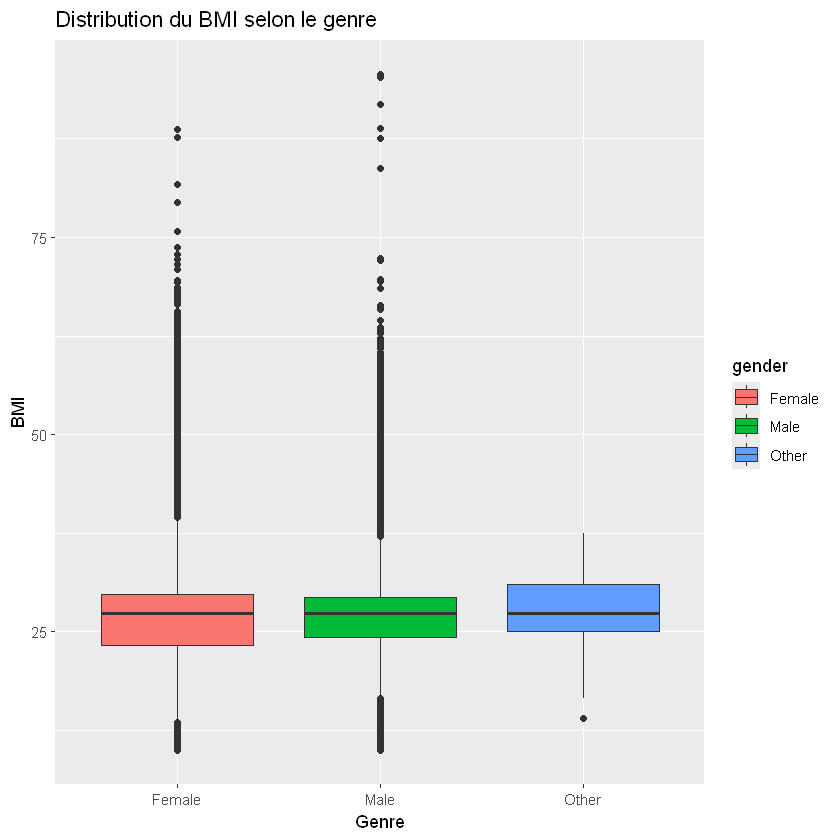

In [68]:
ggplot(data, aes(x = gender, y = bmi, fill = gender)) +
  geom_boxplot() +
  labs(title = "Distribution du BMI selon le genre", x = "Genre", y = "BMI")

Les boîtes des femmes et des hommes présentent une légère différence de largeur et de position. Cela suggère que la distribution de l'IMC pourrait être différente selon le sexe.
L'IMC médian (la ligne au milieu de la boîte) semble être légèrement plus élevé chez les femmes que chez les hommes.
La boîte plus large pour les femmes indique une plus grande dispersion des valeurs d'IMC dans ce groupe.
On observe quelques valeurs aberrantes (points de données individuels situés en dehors des "whiskers") pour chaque sexe, mais légèrement plus chez les femmes.
Interprétations possibles:

D'après la position des boîtes et des médianes, il semble que les femmes de cet ensemble de données puissent avoir un IMC médian plus élevé que les hommes.
La boîte plus large et les valeurs aberrantes chez les femmes suggèrent une plus grande variabilité des valeurs d'IMC chez ce groupe.
Considérations importantes:

Il s'agit simplement d'une représentation graphique, et les plages réelles de l'IMC peuvent ne pas être indiquées sur l'axe.
L'IMC est un indicateur général et ne tient pas compte de la composition corporelle (muscle vs. graisse).
Une analyse plus complète tiendrait compte d'autres facteurs tels que l'âge et l'origine ethnique.
Il est important de consulter un professionnel de la santé pour interpréter votre IMC individuel.

   diabetes         glucose_levels  
 Length:100         Min.   : 53.82  
 Class :character   1st Qu.:100.82  
 Mode  :character   Median :121.22  
                    Mean   :126.98  
                    3rd Qu.:147.66  
                    Max.   :215.07  


	Welch Two Sample t-test

data:  glucose_levels by diabetes
t = 10.258, df = 84.281, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Diabetic and group Non-Diabetic is not equal to 0
95 percent confidence interval:
 38.77934 57.42854
sample estimates:
    mean in group Diabetic mean in group Non-Diabetic 
                  151.0321                   102.9282 



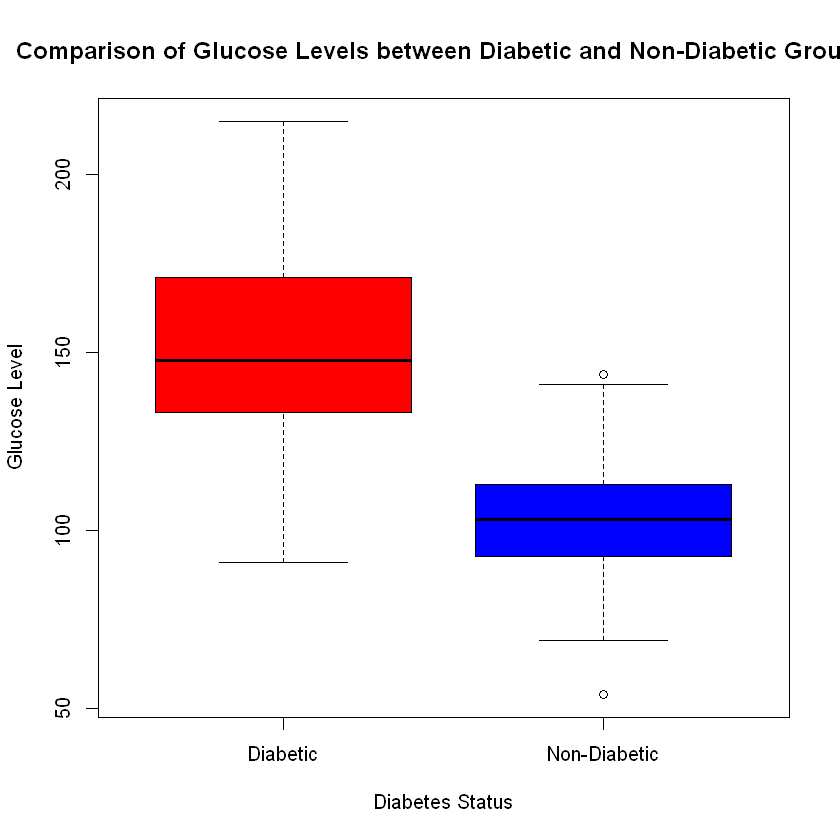

In [69]:
# Création d'un exemple de données
set.seed(123)
diabetes <- c(rep("Diabetic", 50), rep("Non-Diabetic", 50))
glucose_levels <- c(rnorm(50, mean = 150, sd = 30), rnorm(50, mean = 100, sd = 20))
data <- data.frame(diabetes, glucose_levels)

# Affichage des statistiques descriptives
summary(data)

# Test t de Student pour comparer les moyennes
t_test <- t.test(glucose_levels ~ diabetes, data = data)
print(t_test)

# Création d'un graphique boxplot pour visualiser les données
boxplot(glucose_levels ~ diabetes, data = data, col = c("red", "blue"), xlab = "Diabetes Status", ylab = "Glucose Level", main = "Comparison of Glucose Levels between Diabetic and Non-Diabetic Groups")


En observant la distribution des points, on peut voir s'il existe une tendance générale entre le taux de cholestérol total et l'âge.
Une corrélation positive serait indiquée par une tendance générale à la hausse, où des taux de cholestérol plus élevés sont associés à des âges plus avancés.
Une corrélation négative serait indiquée par une tendance à la baisse, où des taux de cholestérol plus faibles seraient liés à des âges plus avancés.
Aucune corrélation ne serait suggérée par une dispersion aléatoire des points sans direction claire vers le haut ou le bas.
Considérations importantes:

Le nuage de points montre uniquement une corrélation, pas une causalité. Cela ne signifie pas nécessairement que l'âge croissant fait augmenter le taux de cholestérol ou vice versa. D'autres facteurs peuvent influencer les deux variables.
La force de la corrélation peut être mesurée statistiquement à l'aide d'un coefficient de corrélation.
Informations supplémentaires:

Il serait instructif de voir s'il existe des valeurs aberrantes (points de données très éloignés du nuage principal) qui pourraient nécessiter un examen plus approfondi.
La mise en évidence de seuils spécifiques de cholestérol total pourrait permettre d'évaluer le nombre de personnes appartenant à des catégories à haut risque.

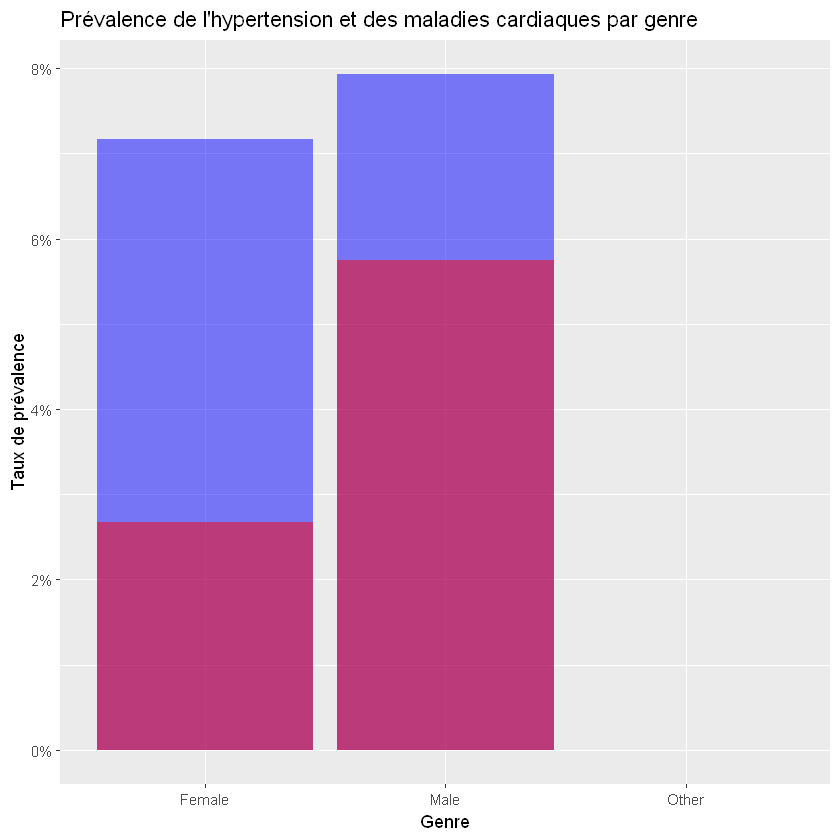

In [70]:
ggplot(gender_conditions, aes(x = gender)) +
  geom_bar(aes(y = hypertension_rate), stat = "identity", fill = "blue", alpha = 0.5) +
  geom_bar(aes(y = heart_disease_rate), stat = "identity", fill = "red", alpha = 0.5) +
  labs(title = "Prévalence de l'hypertension et des maladies cardiaques par genre", x = "Genre", y = "Taux de prévalence") +
  scale_y_continuous(labels = scales::percent)


Un bon modèle aura un nombre élevé de Vrais Positifs (prédictions correctes de cancer) et de Vrais Négatifs (prédictions correctes d'absence de cancer).
Les Faux Positifs (prédictions incorrectes de cancer) et les Faux Négatifs (cas de cancer manqués) sont indésirables et doivent être minimisés.
Il s'agit des cas où le modèle a correctement prédit un cancer malin (positif) et où la biopsie a également confirmé la présence d'un cancer (positif).